In [194]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [195]:
path="C:\IIT BSc. Data Science and Programming\Python\MY2014 Fuel Consumption Ratings (5-cycle) (1).csv" 
df=pd.read_csv(path,encoding='latin1')
df

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL CONSUMPTION_COMB,FUEL CONSUMPTION_COMB (MPG),CO2 EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1067,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1068,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1069,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [196]:
df.describe()

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL CONSUMPTION_COMB,FUEL CONSUMPTION_COMB (MPG),CO2 EMISSIONS
count,1071.0,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2014.0,3.342577,5.788049,13.285901,9.467694,11.572082,26.464052,256.116713
std,0.0,1.415778,1.797425,4.106325,2.788940,3.484679,7.473465,63.530627
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.200000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.600000,10.700000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [197]:
cdf=df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION_COMB','CO2 EMISSIONS ']]
cdf

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION_COMB,CO2 EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1066,3.0,6,11.8,271
1067,3.2,6,11.5,264
1068,3.0,6,11.8,271
1069,3.2,6,11.3,260


Text(0, 0.5, 'CO2 EMISSIONS ')

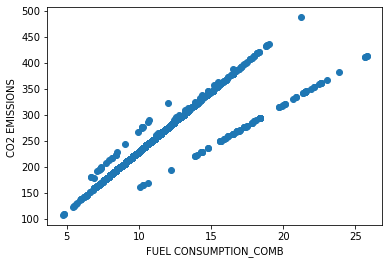

In [198]:
#linear relationship between fuel consumption_comb and CO2 emissions
pl.scatter(df['FUEL CONSUMPTION_COMB'],df['CO2 EMISSIONS '])
pl.xlabel('FUEL CONSUMPTION_COMB')
pl.ylabel('CO2 EMISSIONS ')

Text(0, 0.5, 'CO2 emissions')

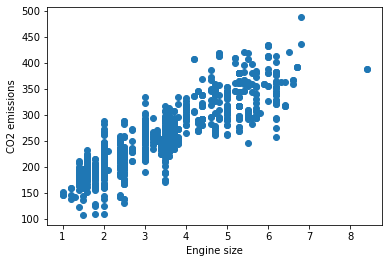

In [199]:
#linear relation between engine size and CO2 emission
pl.scatter(df['ENGINE SIZE'], df['CO2 EMISSIONS '])
pl.xlabel('Engine size')
pl.ylabel('CO2 emissions')

Text(0, 0.5, 'CO2 Emissions')

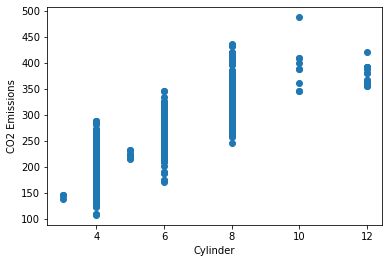

In [200]:
#linear relationship between cylinder and emission
pl.scatter(df['CYLINDERS'], df['CO2 EMISSIONS '])
pl.xlabel('Cylinder')
pl.ylabel('CO2 Emissions')

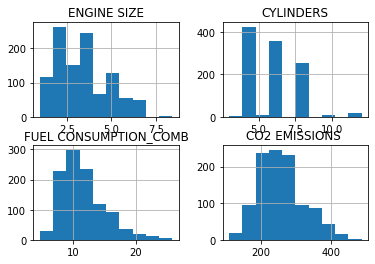

In [201]:
viz= df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION_COMB','CO2 EMISSIONS ']]
viz.hist()
pl.show()

<AxesSubplot:>

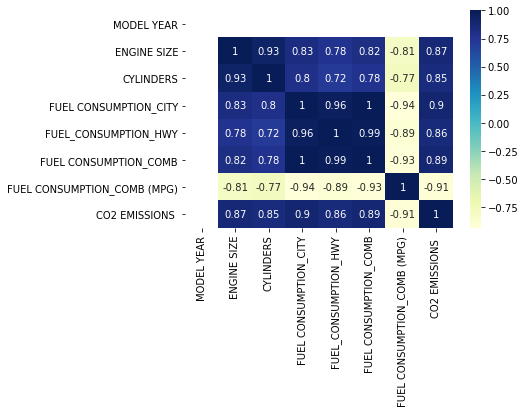

In [202]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# High correlation among variables, let's check through VIF

In [203]:
def vif_scores(df):
    df=df.dropna()
    df = df._get_numeric_data()
    VIF_Scores=pd.DataFrame()
    VIF_Scores['independent features']=df.columns
    VIF_Scores['vif scores']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_Scores
df1= df.iloc[:,:-1]
vif_scores(df1)

,independent features,vif scores
0,MODEL YEAR,369.761324
1,ENGINE SIZE,9.666464
2,CYLINDERS,8.585969
3,FUEL CONSUMPTION_CITY,5543.039550
4,FUEL_CONSUMPTION_HWY,1736.446281
5,FUEL CONSUMPTION_COMB,13178.181574
6,FUEL CONSUMPTION_COMB (MPG),8.299115


In [204]:
df=df.drop(['FUEL CONSUMPTION_COMB','FUEL CONSUMPTION_CITY'], axis=1)
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION_HWY,FUEL CONSUMPTION_COMB (MPG),CO2 EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,6.7,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,7.7,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.8,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,9.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,8.7,27,244


In [205]:
def vif_scores(df):
    df=df.dropna()
    df = df._get_numeric_data()
    VIF_Scores=pd.DataFrame()
    VIF_Scores['independent features']=df.columns
    VIF_Scores['vif scores']=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return VIF_Scores
df1= df.iloc[:,:-1]
vif_scores(df1)

,independent features,vif scores
0,MODEL YEAR,283.739574
1,ENGINE SIZE,9.665198
2,CYLINDERS,8.006069
3,FUEL_CONSUMPTION_HWY,5.215705
4,FUEL CONSUMPTION_COMB (MPG),5.950645


 We realize that FUEL CONSUMPTION_COMB and FUEL CONSUMPTION_CITY have multicollinearity and dropping them and a significant affect on the vif score of others variables.

MODEL YEAR also has high multicollinearity, but dropping it increases the VIF score of other variables, hence we are leaving for simplicity

In [206]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'MAKE'.
df['MAKE']= label_encoder.fit_transform(df['MAKE'])
# Encode labels in column 'MODEL'.
df['MODEL']= label_encoder.fit_transform(df['MODEL'])
# Encode labels in column 'VEHICLE CLASS'.
df['VEHICLE CLASS']= label_encoder.fit_transform(df['VEHICLE CLASS'])
# Encode labels in column 'TRANSMISSION'.
df['TRANSMISSION']= label_encoder.fit_transform(df['TRANSMISSION'])
# Encode labels in column 'FUEL'.
df['FUEL']= label_encoder.fit_transform(df['FUEL'])
# Encode labels in column 'FUEL_CONSUMPTION_HWY'.
df['FUEL_CONSUMPTION_HWY']= label_encoder.fit_transform(df['FUEL_CONSUMPTION_HWY'])


In [207]:
#modelling
from sklearn import linear_model
#splitting data into training data and testing data. We will place target data in separate dataframe y
y_data= df['CO2 EMISSIONS ']

#drop CO2 EMISSIONS data in x data
x_data= df.drop('CO2 EMISSIONS ',axis=1)

#split data into training and testing data using the funtion train_test_split
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)  #testing set is 10% of total dataset

print('number of test samples:', x_test.shape)
print('number of training samples:', x_train.shape)

number of test samples: (108, 10)
number of training samples: (963, 10)


In [208]:
#creating the model

lre=LinearRegression()

#fitting the model
lre.fit(x_train, y_train)    

LinearRegression()

In [210]:
#seeing the predictions

predictions= lre.predict(x_test)
predictions

array([314.52489629, 205.85031344, 240.9849633 , 384.51640904,
       287.20433512, 215.71854183, 364.80122702, 310.22404521,
       323.95109389, 242.13634214, 339.56802552, 322.07688689,
       215.33071135, 273.26533434, 265.25877633, 374.84909649,
       283.21033358, 187.20144666, 276.00395594, 228.36169364,
       152.0655272 , 202.5252216 , 166.94883624, 334.37233552,
       203.23090098, 337.0791715 , 337.69347003, 143.66476055,
       204.20236747, 140.50426547, 252.03234995, 259.70746633,
       294.16992945, 178.28170772, 358.92882703, 198.00577268,
       208.05982714, 312.17510836, 346.80414706, 228.43348244,
       218.16608087, 335.12450727, 342.79685783, 191.35979547,
       244.25170251, 214.5681838 , 197.60456102, 309.79407338,
       257.82118664, 215.07706479, 189.09298979, 213.22901486,
       186.77615449, 348.14125672, 372.93779003, 309.80647467,
       288.06893706, 207.05809648, 201.32617199, 230.00829504,
       195.26072108, 206.8862809 , 220.70235652, 292.36

In [211]:
#actual y values

y_train

165     248
345     396
639     400
592     209
828     138
       ... 
847     301
715     168
905     239
235     244
1061    232
Name: CO2 EMISSIONS , Length: 963, dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO2 EMISSIONS '>

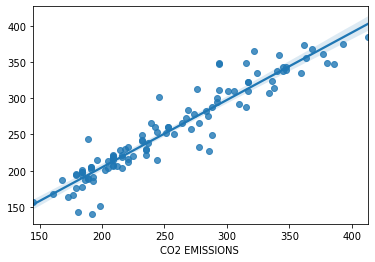

In [212]:
sns.regplot(y_test, predictions)

In [214]:
#determining accuracy of the model

accuracy = lre.score(x_test, y_test)
accuracy= round(accuracy*100)

print('Accuracy of the model is', accuracy,'%')

Accuracy of the model is 90 %
